In [709]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Exploratory Data Analysis / Data Preprocessing</h1>

In [710]:
X_train=pd.read_csv('Train.csv', usecols=['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_train=pd.read_csv('Train.csv', usecols=['Price'])
X=pd.read_csv('Train.csv')

In [711]:
#These are the three brands not there in X_test so we are checking to see if we can remove them.
X_train['Name'].str.split().str[0].str.lower()

brands_of_interest = ['ambassador', 'force', 'smart']
for brand in brands_of_interest:
    count = (X_train['Name'].str.split().str[0].str.lower() == brand).sum()
    print(f"{brand.capitalize()}: {count} cars")

Ambassador: 1 cars
Force: 1 cars
Smart: 1 cars


In [712]:
#Removing them:
uncommon_companies = ['ambassador', 'force', 'smart']
mask = ~X_train['Name'].str.split().str[0].str.lower().isin(uncommon_companies)

X_train = X_train[mask].reset_index(drop=True)
Y_train = Y_train[mask].reset_index(drop=True)

In [713]:
mask = ~X_train.duplicated()

before = X_train.shape[0]
X_train = X_train.drop_duplicates()
after = X_train.shape[0]
print(f"Removed {before - after} duplicate rows.")
Y_train=Y_train[mask]

Removed 6 duplicate rows.


In [714]:
print(X_train.shape)
print(Y_train.shape)

(3741, 11)
(3741, 1)


In [715]:
X.isna().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               28
Power                28
Seats                32
Price                 0
dtype: int64

In [716]:
print("Overview of X_train input:\n\n", X_train.head(5).to_string())
print("\nOverview of Y_train input:\n\n", Y_train.head(5))

Overview of X_train input:

                                          Name   Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine       Power  Seats
0         Tata Tiago 1.2 Revotron XZ WO Alloy  Hyderabad  2017              16500    Petrol       Manual      First  23.84 kmpl  1199 CC      84 bhp    5.0
1  Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT      Kochi  2017              47357    Diesel    Automatic      First  18.49 kmpl  1493 CC     100 bhp    7.0
2      Skoda Rapid 2013-2016 1.6 MPI Ambition     Mumbai  2014              35000    Petrol       Manual      First   15.0 kmpl  1598 CC  103.52 bhp    5.0
3                     Tata Indica V2 DLS BSII     Jaipur  2007             200000    Diesel       Manual     Second   17.2 kmpl  1396 CC    53.5 bhp    5.0
4        Tata Manza Club Class Quadrajet90 LX     Mumbai  2013              64000    Diesel       Manual     Second  21.02 kmpl  1248 CC   88.76 bhp    5.0

Overview of Y_train input:

    Pr

In [717]:
def preprocessing(X_train):
    X_train['Engine'] = X_train['Engine'].str.replace('CC', '')
    X_train['Mileage'] = X_train['Mileage'].str.replace('kmpl', '')
    X_train['Power'] = X_train['Power'].str.replace('bhp', '')
    X_train['Engine'] = X_train['Engine'].astype(float)
    X_train['Mileage'] = X_train['Mileage'].astype(float)
    X_train['Power'] = pd.to_numeric(X_train['Power'],errors='coerce')
    X_train['Mileage']=X_train['Mileage'].fillna(X_train['Mileage'].mean())
    X_train['Engine']=X_train['Engine'].fillna(X_train['Engine'].mean())
    X_train['Seats']=X_train['Seats'].fillna(X_train['Seats'].mean())
    X_train['Power']=X_train['Power'].fillna(X_train['Power'].mean())
    owner_mapping = {
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth & Above': 4
    }    
    X_train['Owner_Type'] = X_train['Owner_Type'].map(owner_mapping)
    for col in ['Kilometers_Driven','Engine']:
        X_train[col] = np.log1p(X_train[col])
    X_train['Age']=2025-X_train['Year']
    X_train.drop(columns='Year', inplace=True)
    X_train['Company'] = X_train['Name'].str.split().str[0].str.lower()
    X_train.drop(columns=['Name'], inplace=True)
    return pd.get_dummies(X_train, columns=['Fuel_Type', 'Transmission','Location','Company'], drop_first=True)

def normx(X):
    X_norm = X.copy()
    for col in X.columns:
        if set(X[col].unique()) == {0} or set(X[col].unique()) == {0, 1}:
            continue  # Skip binary columns (or columns with zero variance)
        mean = X[col].mean()
        std = X[col].std()
        X_norm[col] = (X[col] - mean) / std
    return X_norm

def normy(Y):
    return (Y-Ymean)/Ystd



In [718]:
X_train = preprocessing(X_train)
X=preprocessing(X)

In [719]:
X_train.head(3)

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Age,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,...,Company_mini,Company_mitsubishi,Company_nissan,Company_porsche,Company_renault,Company_skoda,Company_tata,Company_toyota,Company_volkswagen,Company_volvo
0,9.711176,1,23.84,7.090077,84.00,5.0,8,False,True,True,...,False,False,False,False,False,False,True,False,False,False
1,10.765491,1,18.49,7.309212,100.00,7.0,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10.463132,1,15.00,7.377134,103.52,5.0,11,False,True,True,...,False,False,False,False,False,True,False,False,False,False


In [720]:
X_train[X_train['Fuel_Type_Electric']==True]

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Age,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,...,Company_mini,Company_mitsubishi,Company_nissan,Company_porsche,Company_renault,Company_skoda,Company_tata,Company_toyota,Company_volkswagen,Company_volvo
330,10.819798,1,18.050428,4.290459,41.0,5.0,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [721]:
print("\nDetailed analysis of X_train input:\n\n", X_train.describe().to_string())
print("\nDetailed analysis of X_train input:\n\n", Y_train.describe().to_string())


Detailed analysis of X_train input:

        Kilometers_Driven   Owner_Type      Mileage       Engine        Power        Seats          Age
count        3741.000000  3741.000000  3741.000000  3741.000000  3741.000000  3741.000000  3741.000000
mean           10.760999     1.199412    18.050428     7.331583   113.589919     5.278242    11.681369
std             0.712431     0.454107     4.515841     0.342172    53.539072     0.800878     3.260860
min             6.908755     1.000000     0.000000     4.290459    34.200000     2.000000     6.000000
25%            10.434145     1.000000    15.260000     7.089243    78.000000     5.000000     9.000000
50%            10.878066     1.000000    18.060000     7.309212    98.600000     5.000000    11.000000
75%            11.198804     1.000000    20.890000     7.593374   138.030000     5.000000    14.000000
max            13.560620     4.000000    28.400000     8.605570   550.000000    10.000000    27.000000

Detailed analysis of X_train inpu

In [722]:
mask = Y_train['Price'] < 100
X_train = X_train[mask].reset_index(drop=True)
Y_train = Y_train[mask].reset_index(drop=True)
print(X_train.shape, Y_train.shape)

(3740, 44) (3740, 1)


<h2>Outlier Detection</h2>

In [723]:
#Since there is only one EV, we can remove this column.
X_train['Fuel_Type_Electric'].value_counts()

Fuel_Type_Electric
False    3739
True        1
Name: count, dtype: int64

In [724]:
#X_train = X_train.drop(columns=['Fuel_Type_Electric'])

In [725]:
print("Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.\n")
print("Number of datapoints where car has zero mileage:",(X['Mileage'] == 0).sum())
X_train[X_train['Mileage'] == 0].head() #Strange.

Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.

Number of datapoints where car has zero mileage: 46


,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Age,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,...,Company_mini,Company_mitsubishi,Company_nissan,Company_porsche,Company_renault,Company_skoda,Company_tata,Company_toyota,Company_volkswagen,Company_volvo
74,11.695255,1,0.0,6.991177,113.589919,5.000000,20,False,True,True,...,False,False,False,False,False,False,False,False,False,False
130,11.225257,2,0.0,7.391865,113.589919,5.278242,22,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148,9.640173,1,0.0,7.576097,194.000000,5.000000,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
239,10.915125,2,0.0,7.391865,113.589919,5.278242,17,False,False,False,...,False,False,False,False,False,False,False,False,False,False
260,9.903538,1,0.0,8.002360,165.000000,5.000000,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [726]:
mileage_mask = X_train['Mileage'] != 0
X_train = X_train[mileage_mask].reset_index(drop=True)
Y_train = Y_train[mileage_mask].reset_index(drop=True)

In [727]:
#We can clearly see that the model with 72cc is an outlier. But it is also the only electric car in the database and if i remove it, the Fuel_electric column becomes meaningless and my r2 score takes a massive hit.
print(X_train.sort_values(by='Engine', ascending=True))

      Kilometers_Driven  Owner_Type    Mileage    Engine   Power  Seats  Age  \
325           10.819798           1  18.050428  4.290459   41.00    5.0    9   
131            9.888323           1  25.400000  6.437752   37.50    4.0   11   
3550           8.564268           1  21.900000  6.437752   37.48    4.0    9   
622           10.146473           1  25.400000  6.437752   37.50    4.0   11   
1005           9.557470           1  23.900000  6.437752   37.48    4.0    8   
...                 ...         ...        ...       ...     ...    ...  ...   
2119          10.463132           2  11.900000  8.477828  550.00    5.0   15   
3326          11.198228           1   8.500000  8.477828  500.00    5.0   17   
2163           9.966040           1  13.000000  8.507547  395.00    4.0    7   
2565           8.006701           2  12.000000  8.605570  421.00    2.0   11   
3289          10.463132           1   8.100000  8.605570  387.30    2.0   15   

      Fuel_Type_Electric  Fuel_Type_Pet

In [728]:
#Since there are only 13 cars which have cc of over 4.3k, they are outliers.
print((X_train[X_train['Engine']>4300]))

Empty DataFrame
Columns: [Kilometers_Driven, Owner_Type, Mileage, Engine, Power, Seats, Age, Fuel_Type_Electric, Fuel_Type_Petrol, Transmission_Manual, Location_Bangalore, Location_Chennai, Location_Coimbatore, Location_Delhi, Location_Hyderabad, Location_Jaipur, Location_Kochi, Location_Kolkata, Location_Mumbai, Location_Pune, Company_bmw, Company_chevrolet, Company_datsun, Company_fiat, Company_ford, Company_honda, Company_hyundai, Company_isuzu, Company_jaguar, Company_jeep, Company_land, Company_mahindra, Company_maruti, Company_mercedes-benz, Company_mini, Company_mitsubishi, Company_nissan, Company_porsche, Company_renault, Company_skoda, Company_tata, Company_toyota, Company_volkswagen, Company_volvo]
Index: []

[0 rows x 44 columns]


In [729]:
engine_mask = (X_train['Engine'] <= 4300) & (X_train['Engine'] >100)
#X_train = X_train[engine_mask].reset_index(drop=True)
#Y_train = Y_train[engine_mask].reset_index(drop=True)

In [730]:
print("\nDetailed analysis of X_train input:\n\n", X_train.describe().to_string())
print("\nDetailed analysis of X_train input:\n\n", Y_train.describe().to_string())


Detailed analysis of X_train input:

        Kilometers_Driven   Owner_Type      Mileage       Engine        Power        Seats          Age
count        3695.000000  3695.000000  3695.000000  3695.000000  3695.000000  3695.000000  3695.000000
mean           10.758369     1.197564    18.271535     7.331348   113.449835     5.281028    11.634371
std             0.713227     0.451724     4.077099     0.341448    53.617161     0.805363     3.215885
min             6.908755     1.000000     7.940000     4.290459    34.200000     2.000000     6.000000
25%            10.434145     1.000000    15.400000     7.089243    78.000000     5.000000     9.000000
50%            10.878066     1.000000    18.160000     7.309212    98.600000     5.000000    11.000000
75%            11.198228     1.000000    21.010000     7.593374   138.080000     5.000000    14.000000
max            13.560620     4.000000    28.400000     8.605570   550.000000    10.000000    27.000000

Detailed analysis of X_train inpu

In [731]:
power_mask= (X_train['Power'] >= 53.5) & (X_train['Power'] <=400)
X_train = X_train[power_mask].reset_index(drop=True)
Y_train = Y_train[power_mask].reset_index(drop=True)

In [732]:
print(X_train.sort_values(by='Power', ascending=True).head(20))

      Kilometers_Driven  Owner_Type  Mileage    Engine  Power  Seats  Age  \
964           11.259980           1     17.2  7.242082  53.50    5.0   17   
3             12.206078           2     17.2  7.242082  53.50    5.0   18   
3139          10.819798           1     17.2  7.242082  53.50    5.0   17   
3437          10.340258           1     22.7  6.684612  53.64    5.0    7   
3307          10.222305           1     22.7  6.684612  53.64    5.0    8   
157            9.615872           1     22.7  6.684612  53.64    5.0    9   
1942           9.927595           1     22.7  6.684612  53.64    5.0    9   
256           10.235916           1     22.0  6.703188  55.00    5.0    9   
2779          10.915107           1     22.0  6.703188  55.00    5.0   10   
1916          10.757924           1     22.0  6.703188  55.00    5.0   11   
2701           9.852247           1     21.1  6.703188  55.20    5.0   10   
759           11.156265           1     21.1  6.703188  55.20    5.0   12   

<Axes: >

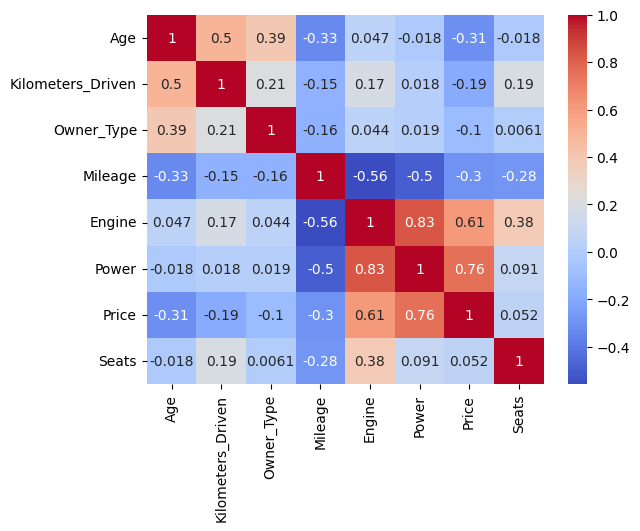

In [733]:
corr = X[['Age','Kilometers_Driven','Owner_Type','Mileage','Engine','Power','Price','Seats']].corr() 
sns.heatmap(corr,annot=True,cmap='coolwarm')

<h1>Training</h1>

In [734]:
Xmean = X_train.loc[:, X_train.apply(lambda col: col.nunique() > 2)].mean()
Xstd = X_train.loc[:, X_train.apply(lambda col: col.nunique() > 2)].std()
Ystd=Y_train.std().item()
Ymean=Y_train.mean().item()
X_train = normx(X_train)
Y_train = normy(Y_train)

In [735]:
print(X_train.isna().sum())


Kilometers_Driven        0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Age                      0
Fuel_Type_Electric       0
Fuel_Type_Petrol         0
Transmission_Manual      0
Location_Bangalore       0
Location_Chennai         0
Location_Coimbatore      0
Location_Delhi           0
Location_Hyderabad       0
Location_Jaipur          0
Location_Kochi           0
Location_Kolkata         0
Location_Mumbai          0
Location_Pune            0
Company_bmw              0
Company_chevrolet        0
Company_datsun           0
Company_fiat             0
Company_ford             0
Company_honda            0
Company_hyundai          0
Company_isuzu            0
Company_jaguar           0
Company_jeep             0
Company_land             0
Company_mahindra         0
Company_maruti           0
Company_mercedes-benz    0
Company_mini             0
Company_mitsubishi       0
Company_nissan           0
C

In [736]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

In [737]:
W_train = np.ones((X_train.shape[1], 1))
B_train= 0.0

In [738]:
def compute_cost(Y,Yp, W, lambd=10):
    cost = (Y-Yp)**2/(2*Y.size)
    reg = (lambd / (2 * Y.size)) * np.sum(W**2)
    return cost.sum()+reg

def z_calc(X,W,B):
    return np.matmul(X,W)+B

In [739]:
Z_train=z_calc(X_train,W_train,B_train)
Z_train

array([[0.49422077125146435],
       [2.179948655929593],
       [1.617075889686979],
       ...,
       [2.2039820429605306],
       [2.41972427869808],
       [1.1787191236468924]], dtype=object)

In [740]:
print(X_train.shape)
print(Y_train.shape)
print(Z_train.shape)

(3557, 44)
(3557, 1)
(3557, 1)


In [741]:
W_history=[]
B_history=[]
Z_history=[]
J_history=[]
W_history.append(W_train)
B_history.append(B_train)
Z_history.append(Z_train)
J_history.append(compute_cost(Y_train,Z_train,W_train))

In [742]:
def gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train, lambd=10):
    for i in range(epoch):
        W_history.append(W_history[-1]-alpha/X_train.shape[0]*((X_train.T @ (Z_train - Y_train)) + lambd * W_history[-1]))
        B_history.append(B_history[-1]-alpha/X_train.shape[0]*np.sum((Z_train-Y_train)))
        Z_train = z_calc(X_train, W_history[-1], B_history[-1])
        Z_history.append(Z_train)
        J_history.append(compute_cost(Y_train,Z_train,W_history[-1]))
        if (i%10)==0:
            print("Iteration:",i, "Cost:", J_history[-1])

In [743]:
epoch=1000
alpha=.4
gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train)

Iteration: 0 Cost: 0.9791538255688823
Iteration: 10 Cost: 0.24516166479950888
Iteration: 20 Cost: 0.21468025087976048
Iteration: 30 Cost: 0.20112554394662088
Iteration: 40 Cost: 0.19287181272946238
Iteration: 50 Cost: 0.1870431007426838
Iteration: 60 Cost: 0.18252246564581118
Iteration: 70 Cost: 0.178795812089068
Iteration: 80 Cost: 0.1755953202054475
Iteration: 90 Cost: 0.17276627838525502
Iteration: 100 Cost: 0.170212086461086
Iteration: 110 Cost: 0.1678691066052749
Iteration: 120 Cost: 0.16569386046322135
Iteration: 130 Cost: 0.1636558475774139
Iteration: 140 Cost: 0.1617332038492029
Iteration: 150 Cost: 0.15990993848115195
Iteration: 160 Cost: 0.15817411627362005
Iteration: 170 Cost: 0.15651663632439322
Iteration: 180 Cost: 0.15493039994907354
Iteration: 190 Cost: 0.15340973816646733
Iteration: 200 Cost: 0.15195001473948588
Iteration: 210 Cost: 0.15054734910245648
Iteration: 220 Cost: 0.1491984217394735
Iteration: 230 Cost: 0.1479003365867119
Iteration: 240 Cost: 0.1466505230631006

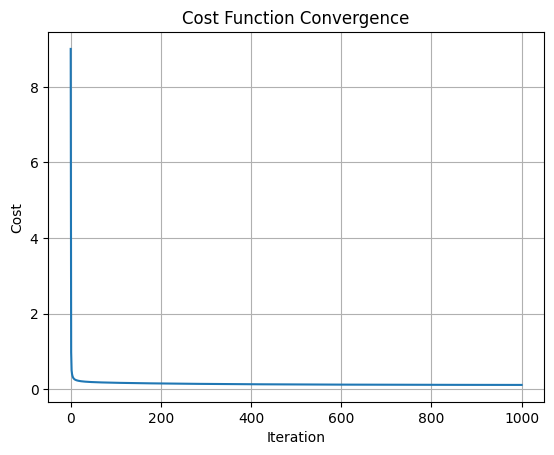

In [744]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

In [745]:
Y_train=Y_train*Ystd+Ymean
Z_train=Z_history[-1]
Z_train=Z_train*Ystd+Ymean

In [746]:
Z_train.min()

-13.722638554497697

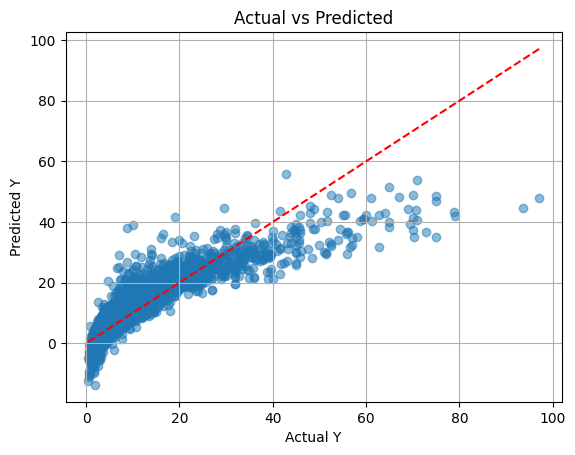

In [747]:
plt.scatter(Y_train, Z_train, alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [748]:
ss_res = ((Y_train - Z_train) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_train - Y_train.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.7857984572143513


In [749]:
#Highest 0.7857984572143513 @ lamba=10

In [750]:
W=W_history[-1]
B=B_history[-1]

In [751]:
W.shape

(44, 1)

<h1>Testing Begins Here</h1>

In [752]:
X_test=pd.read_csv('Test.csv', usecols=['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_test=pd.read_csv('Test.csv', usecols=['Price'])

In [753]:
X_test['Name'].str.split().str[0].unique()

array(['Maruti', 'Hyundai', 'Volvo', 'Audi', 'Ford', 'Porsche',
       'Mercedes-Benz', 'Honda', 'BMW', 'Toyota', 'Skoda', 'Mahindra',
       'Chevrolet', 'Renault', 'Volkswagen', 'Nissan', 'Jaguar', 'Tata',
       'Land', 'Mitsubishi', 'Mini', 'Fiat', 'Datsun', 'Jeep', 'ISUZU'],
      dtype=object)

In [754]:
X_test['Company'] = X_test['Name'].str.split().str[0].str.lower()

In [755]:
X_test['Location'].unique()

array(['Hyderabad', 'Delhi', 'Kochi', 'Pune', 'Kolkata', 'Mumbai',
       'Chennai', 'Coimbatore', 'Jaipur', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [756]:
X_test=preprocessing(X_test)
X_test = normx(X_test)

In [757]:
X_test[X_test['Fuel_Type_Electric']==True]

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Age,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,...,Company_mini,Company_mitsubishi,Company_nissan,Company_porsche,Company_renault,Company_skoda,Company_tata,Company_toyota,Company_volkswagen,Company_volvo
281,-0.09335,-0.439169,0.0,0.445211,-0.829004,-0.363223,0.753903,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [758]:
#X_test = X_test.drop(columns=['Fuel_Type_Electric'])

In [759]:
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()

In [760]:
Y_hat=X_test@W+B
Y_hat = Y_hat*Ystd+Ymean

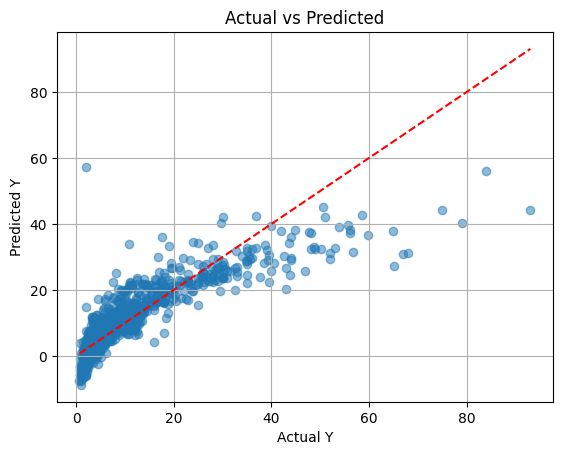

In [761]:
plt.scatter(Y_test, Y_hat, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [762]:
ss_res = ((Y_test - Y_hat) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_test - Y_hat.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.7451473716566723


In [763]:
#R2 score 1 (No outlier removal): 0.5359170687614954
#R2 score 2 (After just adding mileage mask): 0.5467357536866696  
#R2 score 3 (Just engine mask and dropped Fuel_Type_Electric column and no mileage mask): 0.4311169862331051
#R2 score 4 (Mileage mask + Dropped column + Engine mask): 0.44219458559524594
#R2 score 5 (Mileage mask + Dropped column): 0.4297231575559941
#R2 score 6 (Mileage mask + Engine mask without removing the 72cc datapoint so that I don't have to drop the column): 0.5549321408556139
#R2 score 7 (Same as 6 but tweaking the engine mask to get best R2): 0.5554031301729788
#R2 score 8 (Added a power mask too): 0.5692372975661953
#R2 score 9 (Changed normx function): 0.6753593592824518
#R2 score 10 (Finally removed the 72cc anomoly): 0.6753775884824147
#R2 score 11 (Tweaked the power mask to increase r2 score): 0.6771829993019707
#R2 score 12 (Attempted log transformation): 0.6347122829626015
#R2 score 13 (Log transform on just kilometers_driven and Engine.): 0.693063452936226
#R2 score 14 (Added regularisation): 0.6931975254767033
#R2 score 15 (Added getdummies for location): 0.6975027364847113
#R2 score 16 (Added getdummies for companies): 0.7307724309494045
#R2 score 17 (Optimising regularisation lambda value): 0.7458806396176828 @ lambda=15


In [708]:
"""To try:
2-try optimising regularisation lambda value
3- try polynomial features"""

'To try:\n2-try optimising regularisation lambda value\n3- try polynomial features'